In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import os
import fnmatch
from torch.utils.data import Dataset
from PIL import Image
from patch_functions import *
from loss_functions import *
from dataset_functions import *
import torch.optim as optim
import shutil
import scipy


### Transform the matlab file to tensor and save them 

In [ ]:
# Training folder
masks = [f for f in os.listdir(r"C:\Users\derea\OneDrive\Desktop\yolov3\MyWork\dataset\training\masks")]
# Test folder 
masks = [f for f in os.listdir(r"C:\Users\derea\OneDrive\Desktop\yolov3\MyWork\dataset\test\masks")]

for mask in masks:
    mask_path = r'C:\Users\derea\OneDrive\Desktop\yolov3\MyWork\dataset\test\masks' + '/' + mask
    matfile = scipy.io.loadmat(mask_path)
    # Extract the mask from it 
    number = mask[6:-4]
    mask = matfile['BW'+ number]
    mask_tensor = torch.from_numpy(mask)
    tensor_path = r'C:\Users\derea\OneDrive\Desktop\yolov3\MyWork\dataset\test\masks' + '/image' + str(number) + '.pt'
    torch.save(mask_tensor, tensor_path)

### Usefull trasformation functions

In [ ]:
# Transforming from PIL to Tensor
transform1 = transforms.ToTensor()

# Transforming from Tensor to PIL
transform2 = transforms.ToPILImage()

### Definition of the model

In [ ]:
%%capture
# Model: con queste due righe di codice è possibile definire il modello 
model = torch.hub.load('ultralytics/yolov3', 'yolov3', autoshape = False)  # or yolov3-spp, yolov3-tiny, custom
model.eval()

In [ ]:
%%capture
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

#### Labels for the training

In [ ]:
%%capture
# Define the model without the autoshape = False 
model_lab = torch.hub.load('ultralytics/yolov3', 'yolov3')  # or yolov3-spp, yolov3-tiny, custom
model_lab.to(device)

In [ ]:
images_path = '/home/andread98/yolov3/inria/INRIAPerson/Train/pos'
images = [f for f in os.listdir(images_path) if f.endswith('.png')]

for image in images:
    # I consider the txt file path 
    img_path = images_path + '/' + image
    # Get the results 
    results = model_lab(img_path)
    # Trasform the yolo labels into a numpy array to save them
    array = results.xywhn[0].cpu().numpy()
    # Select only the object that are people
    array = array[array[:,-1] == 0]
    # Classes in the first column 
    permutation = [1, 2, 3, 4, 5, 0]
    idx = np.empty_like(permutation)
    idx[permutation] = np.arange(len(permutation))
    array[:] = array[:, idx]
    # Remove the last column
    array = array[:,:-1]
    # Save the array 
    np.savetxt(images_path + '/yolo-labels/' + image[0:-4] + '.txt', array)

In [ ]:
# Number of images in the training set

list = os.listdir('/home/andread98/yolov3/inria/INRIAPerson/Train/pos')
print(len(list)-1)

# Number of images in the training set

list = os.listdir('/home/andread98/yolov3/inria/INRIAPerson/Train/pos/yolo-labels')
print(len(list))

# The two quantities of elements match

### Isolate all the image with a most 2 people

In [ ]:
images_path = '/home/andread98/yolov3/inria/INRIAPerson/Train/pos'
images = [f for f in os.listdir(images_path) if f.endswith('.png')]

for image in images:
    # I consider the txt file path 
    img_path = images_path + '/' + image
    destination = '/home/andread98/yolov3/dataset/' + image
    # Get the results 
    results = model_lab(img_path)
    # Trasform the yolo labels into a numpy array to save them
    array = results.xywhn[0].cpu().numpy()
    # Select only the object that are people
    array = array[array[:,-1] == 0]
    # Classes in the first column 
    permutation = [1, 2, 3, 4, 5, 0]
    idx = np.empty_like(permutation)
    idx[permutation] = np.arange(len(permutation))
    array[:] = array[:, idx]
    # Remove the last column
    array = array[:,:-1]
    if array.shape[0] <= 2:
        # Save the array 
        np.savetxt('/home/andread98/yolov3/dataset/yolo-labels/' + image[0:-4] + '.txt', array)
        # Save a copy of the image in the right folder
        shutil.copy(img_path, destination)
    

In [ ]:
# Number of images in the training set

list = os.listdir('/home/andread98/yolov3/dataset')
print(len(list)-1)

# Number of images in the training set

list = os.listdir('/home/andread98/yolov3/dataset/yolo-labels')
print(len(list))

# The two quantities of elements match

### Changing the name to the masks

In [ ]:
masks_path = '/home/andread98/yolov3/data_mask/mask'
masks = [f for f in os.listdir(masks_path) if f.endswith('.mat')]


In [ ]:
for mask in masks:
    origin = '/home/andread98/yolov3/data_mask/mask/' + mask
    destination ='/home/andread98/yolov3/data_mask/masks/image' + str(mask[6:-4]) +'.mat'
    shutil.copy(origin, destination)

### Save the tensor instead of the .mat file 

In [ ]:
masks_path = '/home/andread98/yolov3/data_mask/masks'
masks = [f for f in os.listdir(masks_path) if f.endswith('.mat')]

for mask in masks:
    number = mask[5:-4]
    matfile = scipy.io.loadmat('/home/andread98/yolov3/data_mask/masks/image' + number + '.mat')
    # Extract the mask from it 
    mask = matfile['BW'+ number]
    tensor = torch.from_numpy(mask)
    save_directory = '/home/andread98/yolov3/data_mask/mask/image'  + number + '.pt'
    torch.save(tensor, save_directory)


### Difference between model() and model().eval()

In [ ]:
# Define the device 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# create the image
image = torch.rand((1,3,640,640))
image = image.to(device)

# model without eval
model = torch.hub.load('ultralytics/yolov3', 'yolov3', autoshape = False)  # or yolov3-spp, yolov3-tiny, custom

output = model(image)
print(output)

# model with eval
model = model.eval()
output = model(image)
print(output)

#They are different, I should use the eval. We don't want to train the network
#But the parameters of the patch!

### VOC dataset

In [ ]:
# Importing the dataset and convert the images to tensors 

training_data = datasets.VOCDetection(
    root= "data",
    year = "2007",
    download = False,
    transform = ToTensor()
)


In [ ]:
batch_size = 1

train_loader = torch.utils.data.DataLoader(
                training_data,
                batch_size=batch_size,
                shuffle=True,
                num_workers=8)

### What is the output of the network?

In [ ]:
img_dir = "/home/andread98/yolov3/inria/INRIAPerson/Train/pos"
batch_size = 6
img_size=640

# Create the train_loader that will be used for the training routine 
# Setting the batch and the image directory

train_loader_2 = torch.utils.data.DataLoader(
                InriaDataset(img_dir, img_size, shuffle=True),
                batch_size=batch_size,
                shuffle=True)

In [ ]:
for i, data in enumerate(train_loader_2):
    image = data
    break

In [ ]:
%%capture
model = torch.hub.load('ultralytics/yolov3', 'yolov3', autoshape = False)  # or yolov3-spp, yolov3-tiny, custom
model.cuda()

In [ ]:
for i, data in enumerate(train_loader_2):
    image = data.cuda()
    print(image.dtype)
    outputs = model(image)
    print('Len output: ',len(outputs))
    print(outputs[0].shape)
    print(outputs[1][0].shape)
    print(outputs[1][1].shape)
    print(outputs[1][2].shape)
    if i==0:
        break

### How to obtain the first tensor given the others
Note that the coordinates of the BB still don't make sense, I need to understand how to compute them starting form the other outputs. 
But, to define the loss the BB coordinates are not necessary. The BB coordinated can be found with the basic version of the algorithm.

In [ ]:
# %%capture
final_true = outputs[0]
yolo_output1 = outputs[1][0]
print(torch.reshape(yolo_output1, (1,3*80*80,85))[0,0,:])
yolo_output1 = torch.reshape(yolo_output1, (1,3*80*80,85)).sigmoid()
print(yolo_output1)

yolo_output2 = outputs[1][1]
yolo_output2 = torch.reshape(yolo_output2, (1,3*40*40,85)).sigmoid()

yolo_output3 = outputs[1][2]
yolo_output3 = torch.reshape(yolo_output3, (1,3*20*20,85)).sigmoid()

final_tensor = torch.cat((yolo_output1,yolo_output2,yolo_output3), dim=1)
print(final_true.shape)
final_tensor.shape[0]

In [ ]:
%%capture
print(final_true[0,0,:])
print(final_tensor[0,0,:])
print(torch.reshape(yolo_output1, (1,3*80*80,85)))
# Same probabilities!!
print(final_true[0,0,4:]==final_tensor[0,0,4:])
print(final_true[0,22999,4:]==final_tensor[0,22999,4:])
print(final_true[0,25199,4:]==final_tensor[0,25199,4:])

In [ ]:
#This works, so we can use the other tensors to compute the backward step
torch.sum(final_tensor).backward()

### Training Routine

#### Entire image

In [ ]:
for i in range(5):   
    # Patch definition
    patch = torch.full((1, 3, 100, 100), 0.5)
    patch = patch.to(device)
    patch.requires_grad_(True)

    # Black image definition
    black_image = torch.zeros((1,3,640,640))
    black_image = black_image.to(device)

    # Loss function
    loss_function = new_loss_tprob(i).to(device)

    # Patch applier function
    apply_function = apply_patch().to(device)

    # Optimizer definition
    optimizer = optim.SGD([patch], lr = 0.03)

    # torch.autograd.set_detect_anomaly(True)

    for epoch in range(50000):  # loop over the dataset multiple times
        print('Iteration number: ', epoch)
        
        b_image = black_image.detach().clone()

        # Applying the patch to the black-image
        image = apply_function(patch,b_image)
        
        # forward of the model
        outputs = model(image)
        loss = torch.mean(-loss_function(outputs))
        # print(loss)

        # zero the parameter gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('Max image grad: ',torch.max(patch.grad))
        print('Min image grad: ',torch.min(patch.grad))
        patch.data.clamp_(0, 1)
        print('Max image: ',torch.max(patch))
        print('Min image: ',torch.min(patch))        # Keep the patch in range (0,1)
        print('Loss value: ',loss)
    
    name = '/home/andread98/yolov3/Results/SGD_class' + str(i) + '.pt'
    torch.save(patch, name)

    # image_PIL = transform2(patch.squeeze(0))
    # image_PIL

In [ ]:
# Save and Load the patch

# torch.save(tensor_name, 'tensor_name.pt')
# tensor_name = torch.load('tensor_name.pt')

In [ ]:
tensor = torch.zeros((3,200,200))
tensor_PIL = transform2(tensor)
tensor_PIL

### Testing the crafted Patch
Let's see if the patch works

In [ ]:
import torch
print(torch.cuda.is_available())

In [ ]:
%%capture
model_test = torch.hub.load('ultralytics/yolov3', 'yolov3')  # or yolov3-spp, yolov3-tiny, custom
model_test.eval()

In [ ]:
patch = torch.load('patch.pt')
black = torch.zeros((1,3,640,640))
apply_function = apply_patch()
image = apply_function(patch,black)
image_PIL = transform2(image.squeeze(0))

In [ ]:
outputs = model_test(image_PIL)
outputs.show()
print(outputs.xywhn[0])

### Trying to apply the patch on all the people

In [ ]:
import torch
from dataset_functions import *
from patch_functions import *

In [ ]:
images_path = '/home/andread98/yolov3/inria/INRIAPerson/Train/pos'
labels_path = '/home/andread98/yolov3/inria/INRIAPerson/Train/pos/yolo-labels'
max_lab = 20
img_size = 614
batch_size = 6



train_loader = torch.utils.data.DataLoader(
                InriaDataset(images_path, labels_path, max_lab, img_size,
                             shuffle=True),
                batch_size=batch_size,
                shuffle=True,
                num_workers=10)

In [ ]:
%%capture
# Definizione dei parametri
a = torch.tensor(0.70)
a.requires_grad_(True)
b = torch.tensor(0.3)
b.requires_grad_(True)
color1 = torch.tensor([1.0,0.0,0.0])
color1.requires_grad_(True)
color2 = torch.tensor([0.0,0.0,1.0])
color2.requires_grad_(True)

params = [a, color1, color2]

gen_function = Fractal_Patch_Generator(20, 300, 3,Tile_Creator_Square,Mask_Creator,2)

gen_function.populate(params)
adv_patch = gen_function.application()
adv_patch.to(device)

In [ ]:
adv_patch.shape

In [ ]:
image_PIL = transform2(adv_patch)
image_PIL

In [ ]:
patch_applier = PatchApplier().to(device)
patch_transformer = PatchTransformer().to(device)
img_size = 614

for i_batch, (img_batch, lab_batch) in enumerate(train_loader):
    print(img_batch.shape)
    img_batch = img_batch.to(device)
    lab_batch = lab_batch.to(device)
    adv_patch = adv_patch.to(device)
    # print(lab_batch)
    adv_batch_t = patch_transformer(adv_patch, lab_batch, img_size, do_rotate=True, rand_loc=False)
    p_img_batch = patch_applier(img_batch, adv_batch_t)
    p_img_batch = F.interpolate(p_img_batch, (img_size, img_size))
                            
    if i_batch == 0:
        break

In [ ]:
adv_batch_t.shape

In [ ]:
image = p_img_batch[1,:,:,:]

image_PIL = transform2(image)
image_PIL

### Working of the mask, how to create a dataloader with image and mask

In [ ]:
from dataset_functions import *

img_dir = '/home/andread98/yolov3/MyWork/data_mask'
mask_dir = '/home/andread98/yolov3/MyWork/data_mask/mask'
img_size = 640


train_loader = torch.utils.data.DataLoader(
                VOCmask(img_dir, mask_dir, img_size,
                             shuffle=True),
                batch_size=2,
                shuffle=True,
                num_workers=10)

dataset = VOCmask(img_dir, mask_dir, img_size,
                             shuffle=True)

In [ ]:
for i_batch, (img_batch, mask_batch) in enumerate(train_loader):
    images = img_batch
    print(images.shape)
    masks = mask_batch
    print(masks.shape)

    if True:
        break

In [ ]:
model = torch.hub.load('ultralytics/yolov3', 'yolov3', autoshape = False)  # or yolov3-spp, yolov3-tiny, custom
model.eval()

In [ ]:
images = images.to(device)
masks = masks.to(device)
results = model(images)

In [ ]:
patch = torch.rand((3,640,640)).to(device)

In [ ]:
attacked_images = images*(1-masks) + patch*masks

In [ ]:
attacked_images.shape

In [ ]:
att_image = attacked_images[0].squeeze(0)
att_image_PIL = transform2(att_image)
att_image_PIL

### Perlin Noise

In [ ]:
from perlin_noise import Perlin_Noise_Creator, Inverted_Perlin_Noise_Creator
import torch

In [ ]:
color1 = torch.tensor([0.5,0.2,0.7])
dim=640

pn_tensor = Perlin_Noise_Creator(dim,color1)
image_PIL = transform2(pn_tensor)
image_PIL

In [ ]:
color1 = torch.tensor([0.5,0.2,0.7])
dim=640

pn_tensor = Inverted_Perlin_Noise_Creator(dim,color1)
image_PIL = transform2(pn_tensor)
image_PIL

In [ ]:
import torch
import random
import numpy as np
import torchvision.transforms.functional as TF
import math
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
from median_pool import MedianPool2d
import math

In [ ]:
# Initial version
class Tile_Creator_Square(object):

    def __init__(self):
        pass
    
    def __call__(self, dim, params):
        # Tensore delle distanze 
        image = torch.zeros((3,dim,dim))
        for i in range(dim):
            for j in range(dim):
                image[:,i,j] = torch.max(torch.abs(torch.tensor(i-(dim-1)/2)/params[0]),torch.abs(torch.tensor(j-(dim-1)/2))/params[0]) - dim/2
        coeff = image.sigmoid()

        # Creation of the colors tensors
        color1_image = params[1].unsqueeze(-1).unsqueeze(-1)
        color1_image = color1_image.expand(-1, dim, dim)

        return (1-coeff)*color1_image, (1-coeff)

    def Params_Creator(self):
        a = torch.tensor(0.50)
        a.requires_grad_(True)
        color1 = torch.tensor([0,1.0,0])
        color1.requires_grad_(True)

        params = [a, color1]
        return params

    def Params_Clamp(self,params):
        params[0].data.clamp_(0, factor)
        params[1].data.clamp_(0, 1)

        return params

In [ ]:
# Final version
class Tile_Creator_Square(object):

    def __init__(self):
        pass
    
    def __call__(self, dim, params):
        # Tensore delle distanze 
        image = torch.zeros((3,dim,dim))
        for i in range(dim):
            for j in range(dim):
                image[:,i,j] = torch.max(torch.abs(torch.tensor(i-(dim-1)/2)/params[0]),torch.abs(torch.tensor(j-(dim-1)/2))/params[0]) - dim/2
        coeff = image.sigmoid()

        # Creation of the colors tensors
        color1_image = params[1].unsqueeze(-1).unsqueeze(-1)
        color1_image = color1_image.expand(-1, dim, dim)

        color2_image = params[2].unsqueeze(-1).unsqueeze(-1)
        color2_image = color2_image.expand(-1, dim, dim)

        return coeff*color1_image + (1-coeff)*color2_image, color1_image, (1-coeff)

    def Params_Creator(self):
        a = torch.tensor(0.50)
        a.requires_grad_(True)
        color1 = torch.tensor([1.0,0,0])
        color1.requires_grad_(True)
        color2 = torch.tensor([0, 1.0, 0])
        color2.requires_grad_(True)

        params = [a, color1, color2]
        return params

    def Params_Clamp(self,params):
        params[0].data.clamp_(0, factor)
        params[1].data.clamp_(0, 1)
        params[2].data.clamp_(0, 1)

        return params
    
    def Give_Color_Perlin(self,params):
        return params[1]

In [ ]:
tile_function = Tile_Creator_Square()
params = tile_function.Params_Creator()
image, _, mask = tile_function(150,params)

In [ ]:
random_tensor = torch.rand((3,150,150))
tot = mask*image + (1-mask)*random_tensor
image_PIL = transform2(tot)
image_PIL

In [ ]:
# Initial version
class Fractal_Patch_Generator_Ghost(nn.Module):

    def __init__(self, dim_patch, dim_image, max_dim, tile_class, angle_type):
        super(Fractal_Patch_Generator_Ghost, self).__init__()
        #Dimension of the patch, smallest component of the attack
        self.dim_patch = dim_patch 
        #Dimension of the image we want to create
        self.dim_image = dim_image
        #Max dimension for the patch
        self.max_dim = max_dim
        #Tile function
        self.tile_class = tile_class
        #Angle Type
        self.angle_type = angle_type

        #Check if they are compatible
        if self.dim_image % self.dim_patch != 0:
            raise Exception('Patch and Image do not have compatible dimensions. Please select the image as a multiple of patch.')

        # How many lines in the grid?
        self.dim_grid = int(self.dim_image/self.dim_patch)
    
    def populate(self, params):
        self.patches = []
        self.masks = []

        for i in range(1,self.max_dim+1):
            patch, _, mask = self.tile_class(self.dim_patch*i, params)
            print(mask.shape)
            self.patches.append(patch)
            self.masks.append(mask)
            
    
    def application(self):
        #Creation of the complete image
        self.image = torch.rand((3,self.dim_image,self.dim_image))
        #Creation of the complete mask
        self.complete_mask = torch.zeros((3,self.dim_image,self.dim_image))
        #Creation of the bool vector 
        self.bool_matrix = np.ones((self.dim_grid,self.dim_grid), dtype=int)
        #Creation of the index vector
        self.index_vector = np.arange(0,(self.dim_grid**2))
        #Creation of the shuffled version
        shuffled_index_vector = np.random.choice(self.index_vector, size=self.dim_grid**2, replace=False)
        # #PIL image of the patch
        # patch_PIL = transform2(patch)

        for index in shuffled_index_vector:
            #Translate the index in coordinates
            i = int(index/self.dim_grid) #row
            j = index%self.dim_grid      #column

            #Check if the corner is still available
            if self.bool_matrix[i][j]:
                av_dim = self.available_dimensions(i,j)
                
                #Choose randomly the dimension
                chosen_dim = int(np.random.choice(av_dim, 1))
                # print(chosen_dim)

                #Change the bool in the bool matrix in False, no longer available
                self.bool_matrix[i:i+chosen_dim,j:j+chosen_dim] = 0

                if self.angle_type == 0:
                    self.image[:,i*self.dim_patch:(i+chosen_dim)*self.dim_patch,j*self.dim_patch:(j+chosen_dim)*self.dim_patch] = self.patches[chosen_dim-1]

                elif self.angle_type == 1:
                    angle = random.choice([0,90,180,270])
                    #Apply the patch to the image
                    self.image[:,i*self.dim_patch:(i+chosen_dim)*self.dim_patch,j*self.dim_patch:(j+chosen_dim)*self.dim_patch] = TF.rotate(self.patches[chosen_dim-1],angle)

                else:
                    #Select the angle
                    angle = random.uniform(0,360)
                    #Rotate
                    out = TF.rotate(self.patches[chosen_dim-1], angle)
                    out2 = TF.rotate(self.masks[chosen_dim-1], angle)
                    # color = self.ex_colors[chosen_dim-1]
                    # #Color in the angles
                    # mask = self.masks[chosen_dim-1]
                    # out[mask] = color[mask]
                    # #Apply the patch to the image
                    self.image[:,i*self.dim_patch:(i+chosen_dim)*self.dim_patch,j*self.dim_patch:(j+chosen_dim)*self.dim_patch] = out
                    self.complete_mask[:,i*self.dim_patch:(i+chosen_dim)*self.dim_patch,j*self.dim_patch:(j+chosen_dim)*self.dim_patch] = out2

        return self.image, self.complete_mask
        
    def available_dimensions(self,i,j):
        #It is always possible to put the smallest version of the patch
        av_dim = [1]

        for dim in range(2, self.max_dim+1):
            sub_matrix = self.bool_matrix[i:i+dim,j:j+dim]
            if np.sum(sub_matrix) == dim**2:
                av_dim.append(dim)
            else:
                break
        
        return av_dim

In [ ]:
# Final version
class Fractal_Patch_Generator(nn.Module):

    def __init__(self, dim_patch, dim_image, max_dim, tile_class, angle_type, BackgroundStyle, mask_function = None):
        super(Fractal_Patch_Generator, self).__init__()
        #Dimension of the patch, smallest component of the attack
        self.dim_patch = dim_patch 
        #Dimension of the image we want to create
        self.dim_image = dim_image
        #Max dimension for the patch
        self.max_dim = max_dim
        #Tile function
        self.tile_class = tile_class
        #Mask function
        self.mask_function = mask_function
        #Angle Type
        self.angle_type = angle_type
        #Background Style
        self.BackgroundStyle = BackgroundStyle

        #Check if they are compatible
        if self.dim_image % self.dim_patch != 0:
            raise Exception('Patch and Image do not have compatible dimensions. Please select the image as a multiple of patch.')

        # How many lines in the grid?
        self.dim_grid = int(self.dim_image/self.dim_patch)
    
    def populate(self, params):

        if self.BackgroundStyle == 0: # Normal situation with a plain color
            self.patches = []
            self.ex_colors = []
            self.masks = []

            for i in range(1,self.max_dim+1):
                patch, ex_color, _ = self.tile_class(self.dim_patch*i, params)
                mask = self.mask_function(self.dim_patch*i)

                self.patches.append(patch)
                self.ex_colors.append(ex_color)
                self.masks.append(mask)
        
        else: # Using the perlin noise in the background
            self.patches = []
            self.masks = []
            # Creation of the perlin noise with the function in perlin_noise.py
            if self.BackgroundStyle == 1:
                self.perlin_noise = Perlin_Noise_Creator(self.dim_image, self.tile_class.Give_Color_Perlin(params))
            if self.BackgroundStyle == 2:
                self.perlin_noise = Inverted_Perlin_Noise_Creator(self.dim_image, self.tile_class.Give_Color_Perlin(params))

            for i in range(1,self.max_dim+1):
                patch, _, mask = self.tile_class(self.dim_patch*i, params)
                self.patches.append(patch)
                self.masks.append(mask)            
    
    def application(self):
        #Creation of the complete image
        self.image = torch.rand((3,self.dim_image,self.dim_image))
        #Creation of the bool vector 
        self.bool_matrix = np.ones((self.dim_grid,self.dim_grid), dtype=int)
        #Creation of the index vector
        self.index_vector = np.arange(0,(self.dim_grid**2))
        #Creation of the shuffled version
        shuffled_index_vector = np.random.choice(self.index_vector, size=self.dim_grid**2, replace=False)
        self.complete_mask = torch.zeros((3,self.dim_image,self.dim_image))

        for index in shuffled_index_vector:
            #Translate the index in coordinates
            i = int(index/self.dim_grid) #row
            j = index%self.dim_grid      #column

            #Check if the corner is still available
            if self.bool_matrix[i][j]:
                av_dim = self.available_dimensions(i,j)
                
                #Choose randomly the dimension
                chosen_dim = int(np.random.choice(av_dim, 1))
                # print(chosen_dim)

                #Change the bool in the bool matrix in False, no longer available
                self.bool_matrix[i:i+chosen_dim,j:j+chosen_dim] = 0

                if self.angle_type == 0:
                    self.image[:,i*self.dim_patch:(i+chosen_dim)*self.dim_patch,j*self.dim_patch:(j+chosen_dim)*self.dim_patch] = self.patches[chosen_dim-1]

                elif self.angle_type == 1:
                    angle = random.choice([0,90,180,270])
                    #Apply the patch to the image
                    self.image[:,i*self.dim_patch:(i+chosen_dim)*self.dim_patch,j*self.dim_patch:(j+chosen_dim)*self.dim_patch] = TF.rotate(self.patches[chosen_dim-1],angle)

                else:
                    #Select the angle
                    angle = random.uniform(0,360)

                    

                    if self.BackgroundStyle == 0: # Normal case
                        #Rotate
                        out = TF.rotate(self.patches[chosen_dim-1], angle)
                        # Getting the background color
                        color = self.ex_colors[chosen_dim-1]

                        # Color in the angles
                        mask = self.masks[chosen_dim-1]
                        out[mask] = color[mask]

                        # Apply the patch to the image
                        self.image[:,i*self.dim_patch:(i+chosen_dim)*self.dim_patch,j*self.dim_patch:(j+chosen_dim)*self.dim_patch] = out

                    else: # Perlin Noise
                        #Rotate
                        out = TF.rotate(self.patches[chosen_dim-1], angle)
                        # Rotate the mask
                        out2 = TF.rotate(self.masks[chosen_dim-1], angle)
                        
                        # Apply the patch to the image  
                        self.image[:,i*self.dim_patch:(i+chosen_dim)*self.dim_patch,j*self.dim_patch:(j+chosen_dim)*self.dim_patch] = out
                        
                        # Tiling all the tile together to create to complete mask 
                        self.complete_mask[:,i*self.dim_patch:(i+chosen_dim)*self.dim_patch,j*self.dim_patch:(j+chosen_dim)*self.dim_patch] = out2

        if self.BackgroundStyle == 0:
            return self.image
        elif self.BackgroundStyle == 1 or self.BackgroundStyle == 2:
            self.image = self.complete_mask*self.image + (1-self.complete_mask)*self.perlin_noise
            return self.image
        else:
            return  self.complete_mask*self.image, self.complete_mask
        
    def available_dimensions(self,i,j):
        #It is always possible to put the smallest version of the patch
        av_dim = [1]

        for dim in range(2, self.max_dim+1):
            sub_matrix = self.bool_matrix[i:i+dim,j:j+dim]
            if np.sum(sub_matrix) == dim**2:
                av_dim.append(dim)
            else:
                break
        
        return av_dim

In [ ]:
def Mask_Creator(dim):
    mask = torch.ones((3,dim,dim), dtype=torch.bool)
    for i in range(dim):
        for j in range(dim):
            if torch.sqrt(torch.tensor((i-(dim-1)/2)**2 + (j-(dim-1)/2)**2)) - (dim/2) < 0:
                mask[:,i,j] = False
    return mask

In [ ]:
tile_function = Tile_Creator_Square()
dim_tile = 16
dim_patch = 640 
mul_fact = 4
angle_type = 2
BackgroundStyle = 0
params = tile_function.Params_Creator()

In [ ]:
gen_function = Fractal_Patch_Generator(dim_tile, dim_patch, mul_fact, tile_function, angle_type, BackgroundStyle, Mask_Creator)
gen_function.populate(params)
image = gen_function.application()
image_PIL = transform2(image)
image_PIL

In [ ]:
tile_function = Tile_Creator_Square()
dim_tile = 16
dim_patch = 640 
mul_fact = 4
angle_type = 2
BackgroundStyle = 3
params = tile_function.Params_Creator()
gen_function = Fractal_Patch_Generator(dim_tile, dim_patch, mul_fact, tile_function, angle_type, BackgroundStyle, Mask_Creator)
gen_function.populate(params)
attack, mask_attack = gen_function.application()
image_PIL = transform2(attack)
image_PIL

### Ghost Patch (just the shape with no background)

#### Patch applier function

In [ ]:
#Original version
class PatchApplierMask(nn.Module):
    """PatchApplier: applies adversarial patches to images.

    Module providing the functionality necessary to apply a patch to all detections in all images in the batch.

    """
    def __init__(self):
        super(PatchApplierMask, self).__init__()

    def forward(self, img_batch, masks_batch, adv_patch):
        att_img_batch = img_batch*(1-masks_batch) + adv_patch*masks_batch
        return att_img_batch

In [ ]:
#New version
class PatchApplierMask_ghost(nn.Module):
    """PatchApplier: applies adversarial patches to images.

    Module providing the functionality necessary to apply a patch to all detections in all images in the batch.

    """
    def __init__(self):
        super(PatchApplierMask_ghost, self).__init__()

    def forward(self, img_batch, mask_attack, masks_batch, adv_patch):
        att_img_batch = img_batch*((1-masks_batch) + masks_batch*(1-mask_attack))+ adv_patch*masks_batch*mask_attack
        return att_img_batch

#### Dataset upload

In [ ]:
import patch_config_mask_test as patch_config_mask_test
mode = 'test'
config = patch_config_mask_test.patch_configs[mode]()

In [ ]:
img_path = r'C:\Users\derea\OneDrive\Desktop\yolov3\MyWork\dataset\test'
mask_path = r'C:\Users\derea\OneDrive\Desktop\yolov3\MyWork\dataset\test\masks'
test_loader = torch.utils.data.DataLoader(
                            VOCmask(img_path, mask_path, 640,
                                        shuffle=True),
                            batch_size= 1,
                            shuffle=True,
                            num_workers=8)

In [ ]:
patch_applier = PatchApplierMask_ghost()

In [ ]:
for i_batch, (img_batch, masks_batch) in enumerate(test_loader):
    image = img_batch
    mask = masks_batch
    attacked_img_batch = patch_applier(image, mask_attack,mask, attack)
    img_PIL = transform2(attacked_img_batch.squeeze(0))
    img_PIL.show()
    if i_batch == 5:
        break

In [ ]:
import os
import glob

path1 = '/home/andread98/yolov3/MyWork/txt_results/22-09-2022/*'
path2 = '/home/andread98/yolov3/MyWork/SampleImages/22-09-2022/*'
path3 = '/home/andread98/yolov3/MyWork/params_results/22-09-2022/*'
paths = [path1, path2, path3]

for path in paths:
    files = glob.glob(path)
    for f in files:
        os.remove(f)

In [ ]:
path = '/dataset/imaterialist-fashion-2019-FGVC6/test'

images = [f for f in os.listdir('/dataset/imaterialist-fashion-2019-FGVC6/test')]

for image in images:
    image_path = '/dataset/imaterialist-fashion-2019-FGVC6/test/' + image
    print(image_path)

### Mission more shapes

In [ ]:
tile_function = Tile_Creator_Circle()
tile_function2 = Tile_Creator_Square()

In [ ]:
tensor = torch.zeros((3,64,64))
params = tile_function.Params_Creator(64)
tile, color, mask = tile_function(64,params)
tensor_step1 = tensor*(1-mask) + tile*mask
params = tile_function.Params_Creator(64)
tile, color, mask = tile_function(64,params)
tensor_step2 = tensor_step1*(1-mask) + tile*mask
params = tile_function2.Params_Creator(64)
tile, color, mask = tile_function2(64,params)
tensor_step3 = tensor_step2*(1-mask) + tile*mask
tensor_PIL = transform2(tensor_step3)
tensor_PIL

In [ ]:
%%capture
# Model: con queste due righe di codice è possibile definire il modello 
model = torch.hub.load('ultralytics/yolov3', 'yolov3', autoshape = False)  # or yolov3-spp, yolov3-tiny, custom
model.eval()

In [ ]:
# put the params in a list
params = tile_function.Params_Creator(64)
print(params)
params2 = tile_function2.Params_Creator(64)
print(params2)
params_tot = params + params2

tensor = torch.zeros((3,64,64))
tile, color, mask = tile_function(64,params)
tensor_step1 = tensor*(1-mask) + tile*mask
tile, color, mask = tile_function2(64,params2)
tensor_step2 = tensor_step1*(1-mask) + tile*mask
tensor_final = tensor_step2.tile((10,10))
print(tensor_final.shape)

learning_rate = 0.001
optimizer = optim.SGD(params_tot, learning_rate)

loss_function = max_prob_class(0)

output = model(tensor_final.unsqueeze(0))
loss = loss_function(output)

loss.backward()

for i in range(len(params_tot)):
    print(params_tot[i].grad)

In [ ]:
from tile_functions import Tile_Creator_Circle, Tile_Creator_Ellipse, Tile_Creator_Square, Tile_Creator_Rectangle, Tile_Creator_Triangle, Tile_Creator_Trapezoid, Tile_Creator
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import os
import fnmatch
from torch.utils.data import Dataset
from PIL import Image
from loss_functions import *
from dataset_functions import *
import torch.optim as optim
import shutil
import scipy 
# Transforming from PIL to Tensor
transform1 = transforms.ToTensor()

# Transforming from Tensor to PIL
transform2 = transforms.ToPILImage()

In [ ]:
tile_function = Tile_Creator_Circle()
params = tile_function.Params_Creator()
print(params)
tile, color, mask = tile_function(64,params)
tile_PIL = transform2(tile)
tile_PIL

In [ ]:
tile_creator = Tile_Creator([3,0,0,0,0,0])
params = tile_creator.Params_Creator()
print(params)
tile, color, mask_tot = tile_creator(64,params)
tile_PIL = transform2(tile)
tile_PIL

In [ ]:
torch.max(mask_tot)
mask_tot.data.clamp_(0, 1)
torch.max(mask_tot)

In [ ]:
# try to apply the perlin noise as background
from perlin_noise import Perlin_Noise_Creator, Inverted_Perlin_Noise_Creator

In [ ]:
color = params[1]
perlin_noise = Inverted_Perlin_Noise_Creator(64,color)

In [ ]:
final_image = tile*mask_tot + perlin_noise*(1-mask_tot)
final_image_PIL = transform2(final_image)
final_image_PIL

### Prove con la funzione frattale

In [ ]:
from patch_functions import Fractal_Patch_Generator, PatchApplierMask
import patch_config_mask as patch_config_mask

In [ ]:
mode = 'perlin_noise'
config = patch_config_mask.patch_configs[mode]()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
config.list_of_shape

In [ ]:
tile_class = Tile_Creator(config.list_of_shape)

In [ ]:
gen_function = Fractal_Patch_Generator(config.dim_tile, config.dim_patch, config.mul_fact, tile_class, config.rotation_mode, config.BackgroundStyle, config.mask_function).to(device)

In [ ]:
params = tile_class.Params_Creator()

In [ ]:
gen_function.populate(params)

In [ ]:
tile_PIL = transform2(gen_function.patches[3])
tile_PIL

In [ ]:
mask_PIL = transform2(gen_function.masks[3])
mask_PIL

In [ ]:
adv_patch, mask_attack = gen_function.application()
adv_patch_PIL = transform2(adv_patch)
adv_patch_PIL
# mask_attack_PIL = transform2(mask_attack)
# mask_attack_PIL

In [ ]:
stringa = '0_ghost.pt'
stringa[:-9]

### Pad the images and the masks

In [ ]:
from PIL import Image

In [ ]:
def pad(img): # this method for taking a non-square image and make it square by filling the difference in w and h with gray
                                       # needed to keep proportions
        h, w = img.size
        if w==h:
            padded_img = img
        else:
            dim_to_pad = 1 if w<h else 2
            if dim_to_pad == 1:
                padding = int((h - w) / 2)
                padded_img = Image.new('RGB', (h,h), color=(0,0,0))
                padded_img.paste(img, (0, int(padding)))
            else:
                padding = (w - h) / 2
                padded_img = Image.new('RGB', (w, w), color=(0,0,0))
                padded_img.paste(img, (int(padding), 0))
        return padded_img

In [ ]:
# Images to pad
images = [f for f in os.listdir(r"C:\Users\derea\OneDrive\Desktop\data\images")]

for image in images:
    image_path = r'C:\Users\derea\OneDrive\Desktop\data\images' + '/' + image
    save_path = r'C:\Users\derea\OneDrive\Desktop\data\images_pad' + '/' + image
    image = Image.open(image_path).convert('RGB')
    image_pad = pad(image)
    image_pad.save(save_path)


In [ ]:
# Masks to pad
images = [f for f in os.listdir(r"C:\Users\derea\OneDrive\Desktop\data\masks")]

for image in images:
    image_path = r'C:\Users\derea\OneDrive\Desktop\data\masks' + '/' + image
    save_path = r'C:\Users\derea\OneDrive\Desktop\data\masks_pad' + '/' + image
    image = Image.open(image_path).convert('RGB')
    image_pad = pad(image)
    image_pad.save(save_path)

### Save the masks as tensors

In [ ]:
# Masks to pad
images = [f for f in os.listdir(r"C:\Users\derea\OneDrive\Desktop\data\masks_pad")]

for img in images:
    image_path = r'C:\Users\derea\OneDrive\Desktop\data\masks_pad' + '/' + img
    output_path = r'C:\Users\derea\OneDrive\Desktop\data\masks_pad_tensors' + '/' + img[:-4] + '.pt'
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform1(image)
    torch.save(image_tensor, output_path)

In [ ]:
# check if they are correct 
# Masks to pad
images = [f for f in os.listdir(r"C:\Users\derea\OneDrive\Desktop\data\masks_pad_tensors")]
count = 0
for img in images:
    print(img)
    count +=1
    image_path = r'C:\Users\derea\OneDrive\Desktop\data\masks_pad_tensors' + '/' + img
    image_tensor = torch.load(image_path)
    image_PIL = transform2(image_tensor)
    image_PIL.show()
    if count == 5:
        break 

In [ ]:
from email.mime import image
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import os
import fnmatch
from torch.utils.data import Dataset
from PIL import Image
from patch_functions import *
from loss_functions import *
from dataset_functions import *
import torch.optim as optim
import shutil
import scipy

# Transforming from PIL to Tensor
transform1 = transforms.ToTensor()

# Transforming from Tensor to PIL
transform2 = transforms.ToPILImage()

images = [f for f in os.listdir('/home/andread98/yolov3/MyWork/data_mask') if f.endswith('.jpeg')]
for img in images:
    image_path = '/home/andread98/yolov3/MyWork/data_mask/' + img
    print(image_path)
    mask_path = '/home/andread98/yolov3/MyWork/data_mask/mask/' + img[:-5] + '.pt'
    print(mask_path)
    image_PIL = Image.open(image_path).convert('RGB')
    h, w = image_PIL.size
    print(h,w)
    mask_tensor = torch.load(mask_path)
    print(mask_tensor.shape)
    image_tensor = transform1(image_PIL)
    print(image_tensor.shape)
    random_attack = torch.ones((3,w,h))
    image_final_tensor = random_attack*mask_tensor + image_tensor*(1 - mask_tensor)
    image_final_tensor_PIL = transform2(image_final_tensor)
    image_final_tensor_PIL.show() 

In [ ]:
from email.mime import image
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import os
import fnmatch
from torch.utils.data import Dataset
from PIL import Image
from patch_functions import *
from loss_functions import *
from dataset_functions import *
import torch.optim as optim
import shutil
import scipy

# Transforming from PIL to Tensor
transform1 = transforms.ToTensor()

# Transforming from Tensor to PIL
transform2 = transforms.ToPILImage()

# images = [f for f in os.listdir('/home/andread98/yolov3/MyWork/data_mask') if f.endswith('.jpeg')]
# for img in images:
#     image_path = '/home/andread98/yolov3/MyWork/data_mask/' + img
#     print(image_path)
#     mask_path = '/home/andread98/yolov3/MyWork/data_mask/mask/' + img[:-5] + '.pt'
#     print(mask_path)
#     image_PIL = Image.open(image_path).convert('RGB')
#     h, w = image_PIL.size
#     print(h,w)
#     mask_tensor = torch.load(mask_path)
#     print(mask_tensor.shape)
#     image_tensor = transform1(image_PIL)
#     print(image_tensor.shape)
#     random_attack = torch.ones((3,w,h))
#     image_final_tensor = random_attack*mask_tensor + image_tensor*(1 - mask_tensor)
#     image_final_tensor_PIL = transform2(image_final_tensor)
#     image_final_tensor_PIL.show() 
    
# Masks to pad
images = [f for f in os.listdir('/home/andread98/yolov3/MyWork/data_mask') if f.endswith('.jpeg')]

for image in images:
    start_path = '/home/andread98/yolov3/MyWork/data_mask' + '/' + image
    end_path = '/home/andread98/yolov3/MyWork/data_mask' + '/' + image[:-5] + '.jpg'
    os.save(start_path,end_path)

### Check the derivatives

In [1]:
from email.mime import image
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import os
import fnmatch
from torch.utils.data import Dataset
from PIL import Image
from patch_functions import *
from loss_functions import *
from dataset_functions import *
import torch.optim as optim
import shutil
import scipy

# Transforming from PIL to Tensor
transform1 = transforms.ToTensor()

# Transforming from Tensor to PIL
transform2 = transforms.ToPILImage()


c:\Users\derea\anaconda3\envs\yolov3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from patch_functions import Fractal_Patch_Generator, PatchApplierMask
from tile_functions import Tile_Creator, Tile_Creator_Circle
import patch_config_mask as patch_config_mask

[1, 0, 1, 0, 1, 0]
[tensor([0.2637, 0.7274]), tensor([0.9889, 0.0450]), tensor([0.0019, 0.0013])]
tensor(0.7000, requires_grad=True) tensor(0.3300, requires_grad=True)


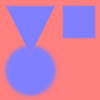

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mode = 'perlin_noise'
config = patch_config_mask.patch_configs[mode]()
print(config.list_of_shape)
tile_creator = Tile_Creator(config.list_of_shape)
print(tile_creator.centroids)
params = tile_creator.Params_Creator()
params = tile_creator.Params_Clamp(params)
print(params[4], params[5])
tile, color, mask = tile_creator(100,params)
tensor_PIL = transform2(tile)
tensor_PIL

In [ ]:



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(config.list_of_shape)
tile_class = Tile_Creator(config.list_of_shape)

gen_function = Fractal_Patch_Generator(config.dim_tile, config.dim_patch, config.mul_fact, tile_class, config.rotation_mode, config.BackgroundStyle, config.mask_function).to(device)
params = tile_class.Params_Creator()
gen_function.populate(params)


# d_tile = torch.autograd.grad(torch.mean(gen_function.patches[0]), params, create_graph=True)
# print(d_tile)

adv_patch, mask_attack = gen_function.application()

# d_patch = torch.autograd.grad(torch.mean(adv_patch), params)
# print(d_patch)

adv_patch_PIL = transform2(adv_patch)
adv_patch_PIL

In [ ]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

data = np.random.uniform(low=0,high=1,size=(500,2))

np.random.shuffle(data)
		
# function to compute euclidean distance
def distance(p1, p2):
	return np.sum((p1 - p2)**2)

# initialization algorithm
def initialize(data, k):
	'''
	initialized the centroids for K-means++
	inputs:
		data - numpy array of data points having shape (200, 2)
		k - number of clusters
	'''
	## initialize the centroids list and add
	## a randomly selected data point to the list
	centroids = []
	centroids.append(data[np.random.randint(
			data.shape[0]), :])

	## compute remaining k - 1 centroids
	for c_id in range(k - 1):
		
		## initialize a list to store distances of data
		## points from nearest centroid
		dist = []
		for i in range(data.shape[0]):
			point = data[i, :]
			d = sys.maxsize
			
			## compute distance of 'point' from each of the previously
			## selected centroid and store the minimum distance
			for j in range(len(centroids)):
				temp_dist = distance(point, centroids[j])
				d = min(d, temp_dist)
			dist.append(d)
			
		## select data point with maximum distance as our next centroid
		dist = np.array(dist)
		next_centroid = data[np.argmax(dist), :]
		centroids.append(next_centroid)
		dist = []
	return centroids

# call the initialize function to get the centroids
centroids = initialize(data, k )


In [ ]:
centroids

In [ ]:
centroids = [torch.from_numpy(item).float() for item in centroids]
centroids

In [ ]:
dummy_list = [1,2,3,4]
sum(dummy_list)